In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

%matplotlib inline  
# makes charts appear inside the notebook


In [3]:
df=pd.read_csv("telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df_clean = df.copy()

# Convert "TotalCharges" to numbers and remove missing rows (common in churn data)
if "TotalCharges" in df_clean.columns:
    df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")
    df_clean = df_clean.dropna(subset=["TotalCharges"])

# Convert Yes/No in the Churn column to 1/0
if "Churn" in df_clean.columns and df_clean["Churn"].dtype == object:
    df_clean["Churn"] = df_clean["Churn"].map({"Yes": 1, "No": 0})

# Remove duplicates
df_clean = df_clean.drop_duplicates()

df_clean.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


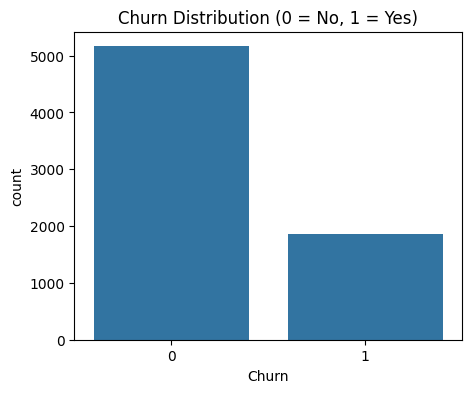

Overall churn rate: 0.26578498293515357


In [7]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=df_clean)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.show()

print("Overall churn rate:", df_clean["Churn"].mean())


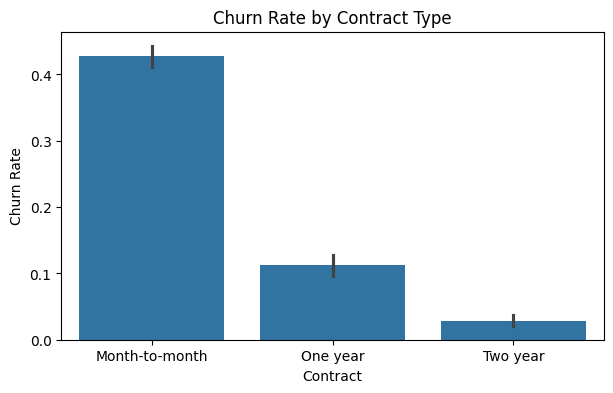

In [8]:
if "Contract" in df_clean.columns:
    plt.figure(figsize=(7, 4))
    sns.barplot(
        x="Contract",
        y="Churn",
        data=df_clean,
        estimator=lambda x: np.mean(x)
    )
    plt.title("Churn Rate by Contract Type")
    plt.ylabel("Churn Rate")
    plt.show()
else:
    print("No 'Contract' column found.")


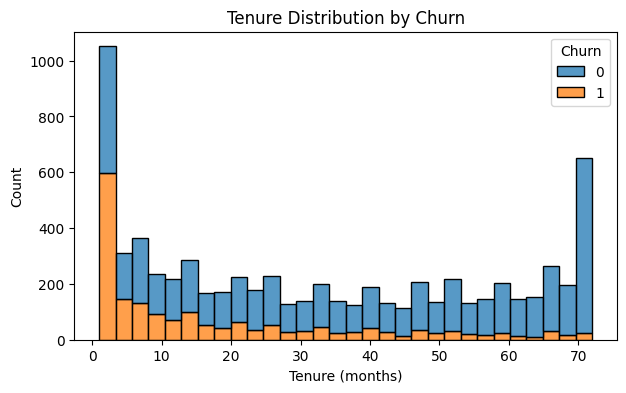

In [9]:
if "tenure" in df_clean.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(
        data=df_clean,
        x="tenure",
        hue="Churn",
        multiple="stack",
        bins=30
    )
    plt.title("Tenure Distribution by Churn")
    plt.xlabel("Tenure (months)")
    plt.show()


In [10]:
y = df_clean["Churn"]
X = df_clean.drop(columns=["Churn", "customerID"], errors="ignore")

# Handle categories
cat_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

X_cat = pd.get_dummies(X[cat_cols], drop_first=True) if cat_cols else pd.DataFrame()
X_num = X[num_cols].copy()

X_final = pd.concat([X_num, X_cat], axis=1)
X_final.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy: 0.8038379530916845
ROC-AUC: 0.8356727976766699

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [13]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.7903340440653873
ROC-AUC: 0.8194630664023069

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



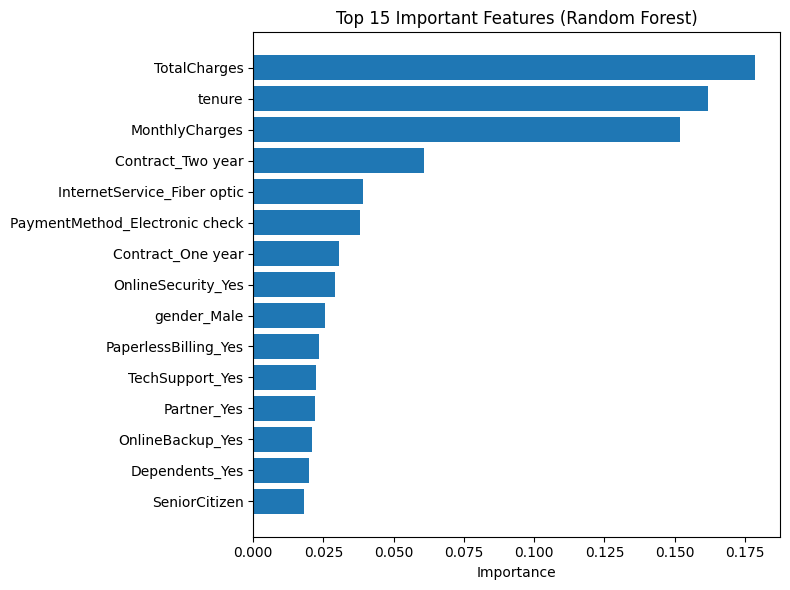

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(8, 6))
plt.barh(X_final.columns[indices][::-1], importances[indices][::-1])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [15]:
# Show information about the columns and their data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# Check for any missing values in the dataset
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# Make a copy of the data to clean
df_clean = df.copy()

# Convert TotalCharges to numbers (some entries have spaces)
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

# Drop any rows where TotalCharges is missing
df_clean = df_clean.dropna(subset=["TotalCharges"])

# Convert Churn from Yes/No to 1/0
df_clean["Churn"] = df_clean["Churn"].map({"Yes": 1, "No": 0})

# Double-check that conversion worked
df_clean["Churn"].value_counts()


Churn
0    5163
1    1869
Name: count, dtype: int64

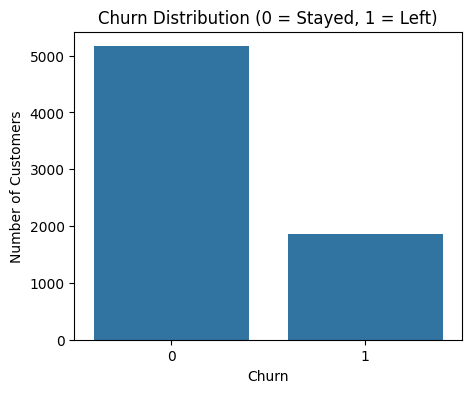

Overall churn rate: 26.58 %


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=df_clean)
plt.title("Churn Distribution (0 = Stayed, 1 = Left)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

print("Overall churn rate:", round(df_clean["Churn"].mean() * 100, 2), "%")


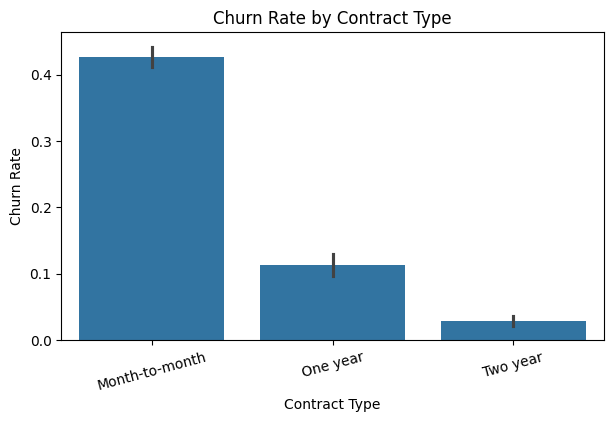

In [19]:
if "Contract" in df_clean.columns:
    plt.figure(figsize=(7, 4))
    sns.barplot(
        x="Contract",
        y="Churn",
        data=df_clean,
        estimator=lambda x: sum(x) / len(x)
    )
    plt.title("Churn Rate by Contract Type")
    plt.ylabel("Churn Rate")
    plt.xlabel("Contract Type")
    plt.xticks(rotation=15)
    plt.show()
else:
    print("No 'Contract' column found.")


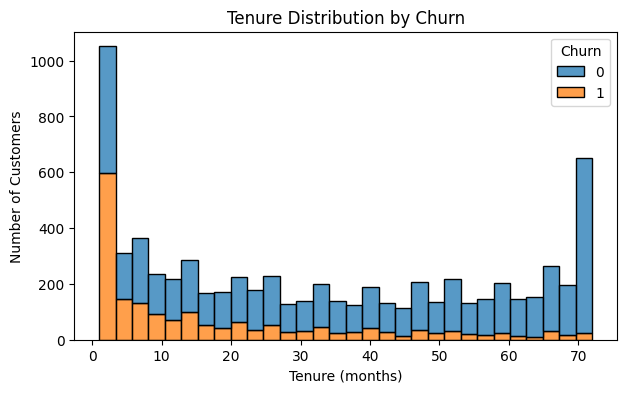

In [20]:
if "tenure" in df_clean.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(
        data=df_clean,
        x="tenure",
        hue="Churn",
        multiple="stack",
        bins=30
    )
    plt.title("Tenure Distribution by Churn")
    plt.xlabel("Tenure (months)")
    plt.ylabel("Number of Customers")
    plt.show()
else:
    print("No 'tenure' column found.")


In [21]:
# Separate features (X) and target (y)
y = df_clean["Churn"]
X = df_clean.drop(columns=["Churn", "customerID"], errors="ignore")

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Convert text columns (like Contract, PaymentMethod, etc.) into numbers
X_cat = pd.get_dummies(X[cat_cols], drop_first=True) if cat_cols else pd.DataFrame()
X_num = X[num_cols].copy()

# Combine both numeric and encoded categorical data
X_final = pd.concat([X_num, X_cat], axis=1)

print("Final number of columns:", X_final.shape[1])
X_final.head()


Final number of columns: 30


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numeric values (helps model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 5625
Testing samples: 1407


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate results
print("=== Logistic Regression Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_lr), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


=== Logistic Regression Results ===
Accuracy: 0.804
ROC-AUC: 0.836

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Random Forest Results ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest Results ===
Accuracy: 0.79
ROC-AUC: 0.819

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



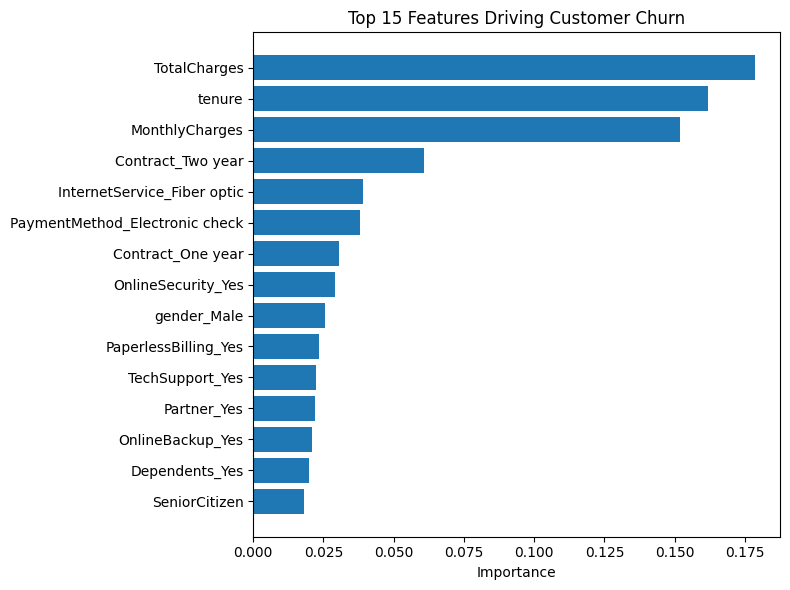

In [25]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]  # top 15 features

plt.figure(figsize=(8, 6))
plt.barh(X_final.columns[indices][::-1], importances[indices][::-1])
plt.title("Top 15 Features Driving Customer Churn")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
